# Capstone Project: Predicting Outcomes of Asylum Cases

**Author:** Paria Elyasi<br>
**Contact:** pariae@me.com<br>
**Date:** 09-19-2022<br>
**Notebook:** 5 of 5

# Overview

Every year people come to the United States seeking protection because they have suffered persecution or fear that they will suffer persecution due to their race, belief, nationality, political opinion, or being members of particular social group. These people can apply for **Asylum** once they are in the United States.

There are two types of **Asylum**:
- **Affirmative Asylum**  
    - If affirmative application is denied, the applicant goes into removal/deportation proceedings and can file for defensive Asylum. 
    - Affirmative asylum cases are overseen by USCIS (U.S. Citizenship and Immigration Services). 
    
    
- **Defensive Asylum**
    - If the immigrant without an immigration status is put into removal proceedings, they can apply for defensive asylum.
    - Defensive Asylum cases are overseen by Immigration Judges.
    
    
It’s a long and difficult journey for those who seek asylum in the unites states. Their journey doesn’t end until they have their case outcome and that’s whether it was accepted or rejected. 

In this project, we will be predicting outcomes of asylum cases to assist immigration attorneys gain better insight and change their approaches accordingly for a favorable outcome. 

Note that we will be looking at defensive asylum cases.

The data used in this project is from the U.S Department of Justice. Please see the citation below. For more details please refer to the **project report**.

**Please Note:** This is **notebook 5 of 5** that were used to make our final conclusions. In our previous notebook, we built another **machine learning model** using **eXtreme Gradient Boosting** (XGBoost) and evaluated our model. 

In **this notebook** we will run a logistic regression model with an additional hyperparameter `class_weight = 'balanced'` and compare it to our unbalanced model. 

Note this is supplementary step only to see how differently our score would be giving more weight to the less represented class in our dataset. 

**Project Citation**: 
U.S. Department of Justice, Executive Office for Immigration Review. EOIR Case Data (July 2019). Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-07-07. https://doi.org/10.3886/E120222V1

## Table of Contents

[1. Loading the Data](#Loading-the-Data)<br>
[2. Train-Test Split](#Train-Test-Split)<br>
[3. Scaling](#Scaling)<br>
[4. Modeling](#Modeling)<br>
[5. Summary](#Summary)<br>

---

# Notebook 5

# Balancing Class & Modeling

In our previous notebook, we built another **machine learning model** using **eXtreme Gradient Boosting** (XGBoost) and evaluated our model. 

In **this notebook** we will run a logistic regression model with an additional hyperparameter `class_weight = 'balanced'` and compare it to our unbalanced model. 

Note this is supplementary step only to see how differently our score would be giving more weight to the less represented class in our dataset.

We will not be performing downsampling or upsampling to balance our classes in this notebook. These will be noted for future of work on this project. 

## Import Libraries

First we will import all the libraries we will be using for this project. 

In [1]:
#import all the libraries needed 

#basic packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#library to split the data for modeling
from sklearn.model_selection import train_test_split

#library for scaling 
from sklearn.preprocessing import MinMaxScaler

#library for logistic regression model
from sklearn.linear_model import LogisticRegression

#library to ignore warnings for logistic regression default solver if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

#libraries for model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#library for f1 score
from sklearn.metrics import f1_score

#library for classification report
from sklearn.metrics import classification_report

In [2]:
#setting figure size
plt.rcParams['figure.figsize'] = (10, 7)

## Loading the Data

In this section we will be importing the data and discovering some information such as the shape of our dataframe and column types.

In [3]:
#load our data 
df_asylum = pd.read_csv('data/asylum_dataset_modelv2.csv')

In [4]:
#check data
pd.set_option('display.max_columns', None) #display max columns
df_asylum.head()

,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATI

In [5]:
#check shape
df_asylum.shape

(482829, 1037)

In [6]:
print(f'Our dataset has {df_asylum.shape[0]} rows and {df_asylum.shape[1]} columns.')

Our dataset has 482829 rows and 1037 columns.


In [7]:
#check info
df_asylum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482829 entries, 0 to 482828
Columns: 1037 entries, DECISION to ATTY_REP_Yes
dtypes: int64(1037)
memory usage: 3.7 GB


In [8]:
#check for null values
df_asylum.isna().sum().sum()

0

As always, we will check the class distribution. 

In [9]:
#check class distribution
df_asylum['DECISION'].value_counts(normalize=True)*100

0    87.657328
1    12.342672
Name: DECISION, dtype: float64

Next we will define our X and y. 

In [10]:
#define X and y
X = df_asylum.drop(columns='DECISION')
y = df_asylum['DECISION']

In [11]:
#check X
X.head()

,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATIONALITY_S

In [12]:
#check y
y.head()

0    0
1    0
2    0
3    1
4    0
Name: DECISION, dtype: int64

In [13]:
#check shape for both X and y
print(f'Shape of X is : {X.shape}')
print(f'Shape of y is : {y.shape}')

Shape of X is : (482829, 1036)
Shape of y is : (482829,)


Great, now that we have our X and y set, we can take a Train set and a Test set for our modeling.

## Train-Test Split

In this section we will be splitting our dataset into Train and Test. Note that as we will be using a Train and Validation set later, we will initially call it our Remainder (Train + Validation) and Test split.

We will set our test size as 30% (train size will be 70% of our dataset). Note that between 30% to 20% is ideal for test size. 

In [14]:
#split our X and y into remainder (train + validation) and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [15]:
#check shape for X_remainder and y_remainder
print(f'Shape of X_remainder set: {X_remainder.shape}')
print(f'Shape of y_remainder set: {y_remainder.shape}')

Shape of X_remainder set: (337980, 1036)
Shape of y_remainder set: (337980,)


In [16]:
#check shape for X_test and y_test
print(f'Shape of X_test set: {X_test.shape}')
print(f'Shape of y_test set: {y_test.shape}')

Shape of X_test set: (144849, 1036)
Shape of y_test set: (144849,)


## Scaling

Scaling is an important part of data preprocessing which is done before modeling. Our models will work better if our features are on similar scale.

Since we have a lot of binary features, we will use `MinMaxScaler()` for scaling our data. Min-Max Scaler would scale our non binary features to have values between 0 and 1 which would put them in the same scale as our binary values which are either 0 or 1. 

In [17]:
#MinMax Scaler

#instantiate
scaler = MinMaxScaler()

#fit  - on remiander set
scaler.fit(X_remainder)

#transform - on both remainder and test set
X_remainder_scaled = scaler.transform(X_remainder)
X_test_scaled = scaler.transform(X_test)

Now that we have scaled our features, we can start modeling. 

# Modeling

### Linear Classifier: Logistic Regression Model

In this section we will be fitting a **logistic regression model** and look at it's performance and accuracy in predicting our target. (`DECISION`).

Similar to the logistic regression model we ran in our notebook 3, will be fitting a baseline vanilla model to see how the performance is with `class_weight = 'balanced` hyperparameter added. Later we will assess and find optimal C value (hyperparameter). 

In [18]:
#Logistic Regression Model - IFS (Instantiate - Fit - Score)
#instantiate
baseline_logreg_model = LogisticRegression(class_weight='balanced', random_state=1)

#fit
baseline_logreg_model.fit(X_remainder_scaled, y_remainder)

#score
print(f'Accuracy on remainder set: {baseline_logreg_model.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {baseline_logreg_model.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.8753772412568791
Accuracy on test set: 0.8749249218151316


**Logistic Regression Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Optimized Log Reg Model - Not using class_weight| 0.932235635|0.931722000
| Baseline Log Reg Model - Using class_weight | 0.875377241 |0.874924921

As we can see, using the `class_weight = 'balanced'` hyperparameter, gave us a lower score. We don't see any overfitting; however, the score has dropped compared do the previous logistic regression models without the `class_weight` hyperparameter. 

Let's try to find the optimal c value using a validation set and fit our model again to compare. 

We will split out remainder dataset into train and validation and try different weights (C) to see what is the optimal C value.

In [19]:
#split the remainder set into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size=0.30, random_state=1, stratify=y_remainder)

#print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_validation)} data points.')

The train set has 236586 data points.
The validation set has 101394 data points.


Let's check the shape for all sets one again. 

In [20]:
#check shape 
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (144849, 1036)
Shape of validation set: (101394, 1036)
Shape of train set: (236586, 1036)


Let's check to make sure the class proportions have been preserved in all sets.

In [21]:
print('Proportions in remainder set:')
print(y_remainder.value_counts()/len(y_remainder), '\n')

print('Proportions in test set:')
print(y_test.value_counts()/len(y_test), '\n')

print('Proportions in train set:')
print(y_train.value_counts()/len(y_train), '\n')

print('Proportions in validation set:')
print(y_validation.value_counts()/len(y_validation), '\n')

Proportions in remainder set:
0    0.876573
1    0.123427
Name: DECISION, dtype: float64 

Proportions in test set:
0    0.876575
1    0.123425
Name: DECISION, dtype: float64 

Proportions in train set:
0    0.876573
1    0.123427
Name: DECISION, dtype: float64 

Proportions in validation set:
0    0.876571
1    0.123429
Name: DECISION, dtype: float64 



Great, from the above numbers we can see that the class proportions have been preserved.
Next we will scale our train and validation set.

In [22]:
#scale X_train and X_validation

#MinMax Scaler

#instantiate
scaler = MinMaxScaler()

#fit - only the train set
scaler.fit(X_train)

#transform - both train and validation set
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

Now that we have scaled our train and validation sets, we can look for the optimal C value by applying different ranges C, fitting it to our training set and testing it on our training and validation set.
Once we find the optimal C value, we will apply it to our remainder and test set to find our model's accuracy scores.

In [23]:
#calculating score with ranges of C
train_scores = []
validation_scores = []

c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

for c in c_values:
    #instantiate
    logreg_model = LogisticRegression(C = c, class_weight='balanced',random_state=1)
    #fit
    logreg_model.fit(X_train_scaled, y_train)
    #score
    train_scores.append(logreg_model.score(X_train_scaled, y_train))
    validation_scores.append(logreg_model.score(X_validation_scaled, y_validation))

In [24]:
#check the accuracies
pd.DataFrame({'C value': c_values, 'train accuracy': train_scores, 'validation accuracy': validation_scores})

,C value,train accuracy,validation accuracy
0,0.00001,0.813366,0.811143
1,0.00010,0.826613,0.825256
2,0.00100,0.838266,0.837416
3,0.10000,0.871649,0.870328
4,1.00000,0.874354,0.872192
5,10.00000,0.875073,0.872921
6,100.00000,0.875107,0.872912
7,1000.00000,0.874612,0.872537
8,10000.00000,0.874891,0.872626


Let's visualize the above values. Note that we will use a grid in our visualization to better see the values.

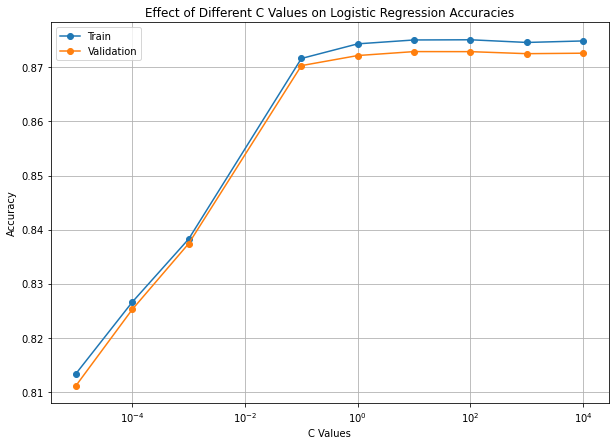

In [25]:
#plot the above to compare c values
plt.figure()
plt.plot(c_values, train_scores,label="Train",marker='o')
plt.plot(c_values, validation_scores,label="Validation",marker='o')
plt.xscale('log')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title('Effect of Different C Values on Logistic Regression Accuracies')
plt.legend()
plt.grid()
plt.show()

Looking at the above graph, we can see that after C value of 1, the train score and validation score are parallel and very close to one another without overfitting.

We will pick the C value that yields the highest validation accuracy and is close to the train accuracy.

That would be C value of 10. Now we can apply the C value to our model and score our test set.

In [26]:
#apply best performing C Value from above to our remainder and test set to see accuracy scores

#instantiate
logreg_model = LogisticRegression(C = 10, random_state=1, class_weight='balanced')

#fit
logreg_model.fit(X_remainder_scaled, y_remainder)

#score
print(f'Accuracy on remainder set: {logreg_model.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {logreg_model.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.8758831883543405
Accuracy on test set: 0.8754841248472547


**Logistic Regression Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Optimized Log Reg Model - Not using class_weight| 0.932235635|0.931722000
| Baseline Log Reg Model - Using class_weight | 0.875377241 |0.874924921
| Optimized Log Reg Model - Using class_weight| 0.875883188|0.875484124

We can see that our optimized logistic regression model using `class_weight` is doing slightly better than our baseline logitstic regression model using `class_weight`. 

Both these scores are lower than our logistic regression model without the `class_weight` hyperparameter. 

But we can't rely on accuracy score alone when evaluating our models. Let's look at the confusion matrix for our **Optimized Log Reg Model - using `class_weight`**. 

### Model Evaluation

In this section we will be evaluating our **Optimized Log Reg Model (`class_weight`)**. Let's look at the confusion matrix for this model.

In [27]:
#get class predictions
y_pred = logreg_model.predict(X_test_scaled)

#generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,111292,15679
True Class 1,2357,15521


Note that for this model evaluation, we will not go into as much detail as we did with the evaluation of our best performing model which was our XGBoost Model from notebook 4. 

From the above confusion matrix chart we can see that we have some underfitting as the total number of **False Negatives** are less than the total number of **False Positives**. 

Let's plot our confusion matrix to get a better idea. 

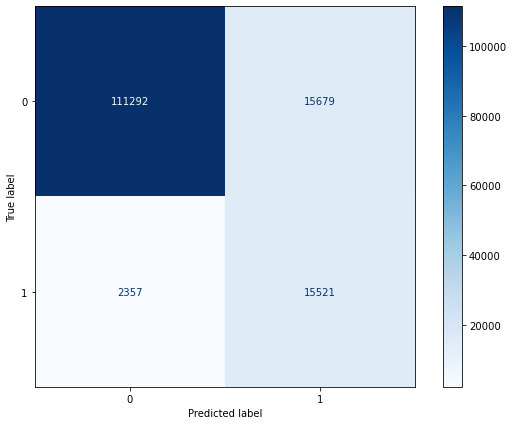

In [28]:
#plot the confusion matrix
plot_confusion_matrix(logreg_model, X_test_scaled, y_test, cmap='Blues');

Let's look at our classification report to see our precisions and recalls. 

In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93    126971
           1       0.50      0.87      0.63     17878

    accuracy                           0.88    144849
   macro avg       0.74      0.87      0.78    144849
weighted avg       0.92      0.88      0.89    144849



**Precision** is what percent of our model predictions were correct. We can see our model correctly predicted **50%** of class 1 and **98%** of class 0. 

Let's look at our precision this way:

- Of all asylee applicants that were predicted to be granted asylum (get accepted), how many actually got accepted? **50%**

**Recall** is what percent of positives were correctly identified. We can see our model correctly identified **87%** of positives in class 1. 

Let's look at our recall this way:

- Of all applicants who were granted asylum (accepted), how many were we able to correctly predict? **87%**

If we wanted to look at corruption in the immigration court system, we could have used this model as there are applicants who we predicted should have been accepted but got rejected. 

We would like to focus on the precision as we don't want to tell applicants they will get accepted however they will actually get rejected. 

Choosing the appropriate metric depends on the business objective. For our business objective, we would like to focus on higher precision. 

Why did we pick precision? Because the **false negative** in our case is more acceptable and tolerable than false positive. Meaning that it is easier for immigration attorneys to mistakenly tell their asylee clients they will get rejected when in actuality they will get accepted. It is harder for immigration attorneys to tell their clients mistakenly that their application will be accepted and asylum will be granted when in actuality it will not. Therefore, we will choose precision as our model evaluation metric.

That being said, our **XGBoost Model had the highest accuracy and highest precision** out of all our other models including this one.

Let's look at the ROC curve and AUC next. 

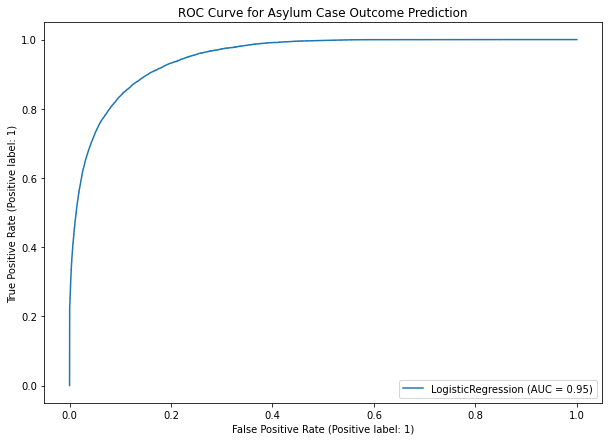

In [30]:
#import library
from sklearn.metrics import plot_roc_curve

#plot ROC curve
plot_roc_curve(logreg_model, X_test_scaled, y_test)
plt.title('ROC Curve for Asylum Case Outcome Prediction')
plt.show()

Our model's AUC score is 0.95. Note that the higher the AUC score, the better our model is predicting class 0 as 0 and class 1 as 1.

So overall this model is also doing well as our AUC score is close to 1. 

As future work for this project, we can try upsampling or downsampling and run our models again to see who differently it performs. Again for now it is outside the scope of this project. 

This concludes our model evaluation. 

---

# Summary

In this notebook we fitted a logistic regression model with an additional hyperparameter `class_weight = 'balanced'` and compare it to our logistic regression model without `class_weight` hyperparameter.

After fitting and evaluating this model:
- We saw that the accuracy score dropped compared to our previous model
- recall was higher than other models however precision was much lower at 50%

Note that since this was supplementary model, we did not look at feature coefficients and model interpretation. 

Our best performing model is still our **XGBoost Model** which we covered in previous notebook (notebook 4). 

In this project I chose classification models and predicted the outcomes of asylum cases. The goal of this project was to look at what features make a difference in outcomes of asylum cases to help immigration attorneys change their approaches accordingly for a favorable outcome. 

The features that all three models had in common as strong predictors were: **Nationality (specifically Honduras and Guatemala), Absentia (if the applicant was absent at hearing), Date of Entry (year), Case Description (specifically Credible Fear Review and Reasonable Fear Case).**

There was also a great importance given to the immigration judge who reviews the cases. Again, there has been research that some immigration judges reject cases no matter how strong the case is. At this point I don’t have enough evidence or confidence to conclude this however as only the logistic regression model coefficients had immigration judges as features predictive of both acceptance and rejection.  
 
Future of work for this project will be to continue the same steps on a better dataset from the non-profit organization. Having features such as educational background and marital status could assist further into our findings and predictions. I would also like to reduce the number of features (those that didn’t show any importance in the models). 

For example, using only top 5 nationalities instead of all nationalities could work better for our model’s accuracy. Taking a forward selection approach as oppose to backward selection will be applied to this project as well. I would also like to add features such as weather and news headlines to see if any interesting trends can be found and how those would change the models’ predictions. 

This concludes our capstone project on predicting the outcomes of asylum cases in the United States. 

---